# LA Park Data
This is an exploration of the LA Parks Dataset.

In [1]:
# import pandas, geopandas, contextily and matplotlib
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# import park data from la city data portal
parks = gpd.read_file("https://data.lacity.org/api/geospatial/rwq7-yhp5?method=export&format=GeoJSON")

In [3]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        561 non-null    object  
 1   shape_area  561 non-null    object  
 2   objectid    561 non-null    object  
 3   park_id     561 non-null    object  
 4   name_alpha  561 non-null    object  
 5   shape_leng  561 non-null    object  
 6   area_acres  561 non-null    object  
 7   issubpark   561 non-null    object  
 8   region      561 non-null    object  
 9   address     561 non-null    object  
 10  name_publi  330 non-null    object  
 11  park_class  561 non-null    object  
 12  cd_real     561 non-null    object  
 13  geometry    561 non-null    geometry
dtypes: geometry(1), object(13)
memory usage: 61.5+ KB


In [ ]:
#show the first few lines to get a sense of what data look like
parks.head()

In [ ]:
# what's the data type?
type(parks)

In [ ]:
parks.tail()

In [ ]:
parks.shape

In [ ]:
parks['cd_real'].value_counts()

In [ ]:
# save it as a variable
park_count = parks['cd_real'].value_counts()

In [ ]:
park_count

In [ ]:
type (park_count)

In [ ]:
#convert to a dataframe
park_count = park_count.reset_index()
park_count

In [ ]:
park_count.columns.to_list()

In [ ]:
park_count.columns = ['district', 'count']

In [ ]:
park_count

In [ ]:
#create a chart with arguments
park_count.plot.bar (x = 'district', 
                     y = 'count', 
                     title = 'Number of parks per City Council District',
                    color = "green",
                    linewidth = 30)

<AxesSubplot:>

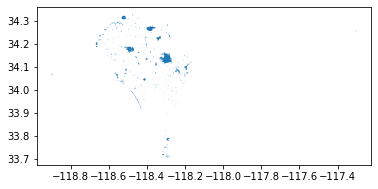

In [5]:
parks.plot()

In [4]:
parks.drop([540])

,name,shape_area,objectid,park_id,name_alpha,shape_leng,area_acres,issubpark,region,address,name_publi,park_class,cd_real,geometry
0,Robert F Kennedy Inspiration Memorial Park,6501.37488025,1,1056,ROBERT F KENNEDY PARK (LAUSD) JUA,641.47054538,0.149251627315,N,M,"3400 W Wilshire Blvd, LA 90010",Kennedy (Robert F) Inspiration Memorial Park (...,N,10,"MULTIPOLYGON (((-118.29796 34.06162, -118.2969..."
1,Sycamore Grove Park,691462.199493,2,736,SYCAMORE GROVE PARK,6227.3991903,15.8738513625,N,M,"4702 N Figueroa St, LA 90042",Sycamore Grove Park,C,01,"MULTIPOLYGON (((-118.20110 34.10134, -118.2011..."
2,San Pedro Welcome Park,17402.1579777,3,328,SAN PEDRO WELCOME PARK,560.372862441,0.399500174163,N,P,"451 N Gaffey St, San Pedro 90731",Formerly Welcome Park,N,15,"MULTIPOLYGON (((-118.29286 33.74600, -118.2928..."
3,Country Club Heritage Park,3647.84860118,4,1045,COUNTRY CLUB PARK HERITAGE PLAZA,287.523337381,0.0837434158085,N,M,"1015 S Wilton Pl, LA 90018",AKA Wilton Place Park,N,10,"MULTIPOLYGON (((-118.31504 34.05232, -118.3149..."
4,Watts Cultural Crescent,128793.355722,5,1046,WATTS CULTURAL CRESCENT,2852.11033344,2.95670043382,N,P,"1780 E Santa Ana Blvd, LA 90002",AKA Watts Towers Cultural Cresent,N,15,"MULTIPOLYGON (((-118.24221 33.93945, -118.2422..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,Los Angeles River Greenway,132354.80071,558,1137,LOS ANGELES RIVER GREENWAY - LAUREL CANYON TO ...,6045.51423906,3.03846028767,Y,V,"12305 W Valleyheart Dr South, Studio City 91604",None,R,02,"MULTIPOLYGON (((-118.39719 34.14454, -118.3972..."
557,South Palos Verdes Street Park,17682.6918121,568,1115,SOUTH PALOS VERDES STREET PARK,548.042636013,0.405940370594,N,P,"200-220 S Palos Verdes St, 90731","South Palos Verdes Street Park, Community Garden",N,15,"MULTIPOLYGON (((-118.28107 33.74228, -118.2809..."
558,Sunnynook River Park,41685.1517063,579,1093,SUNNYNOOK RIVER PARK,1777.67071108,0.956963233412,Y,M,"2901 N Glendale Blvd, LA 90039",Sunnynook River Park,R,04,"MULTIPOLYGON (((-118.26586 34.11353, -118.2659..."
559,Los Angeles River Greenway,1342.83912884,580,1138,LAURELGROVE PEDESTRIAN BRIDGE,332.093587483,0.0308274678654,Y,V,"12305 W Valleyheart Dr South, Studio City 91604",LOS ANGELES RIVER GREENWAY - LAURELGROVE PEDES...,R,02,"MULTIPOLYGON (((-118.40091 34.14380, -118.4009..."


In [6]:
parks_mercator = parks.to_crs(epsg=3857)

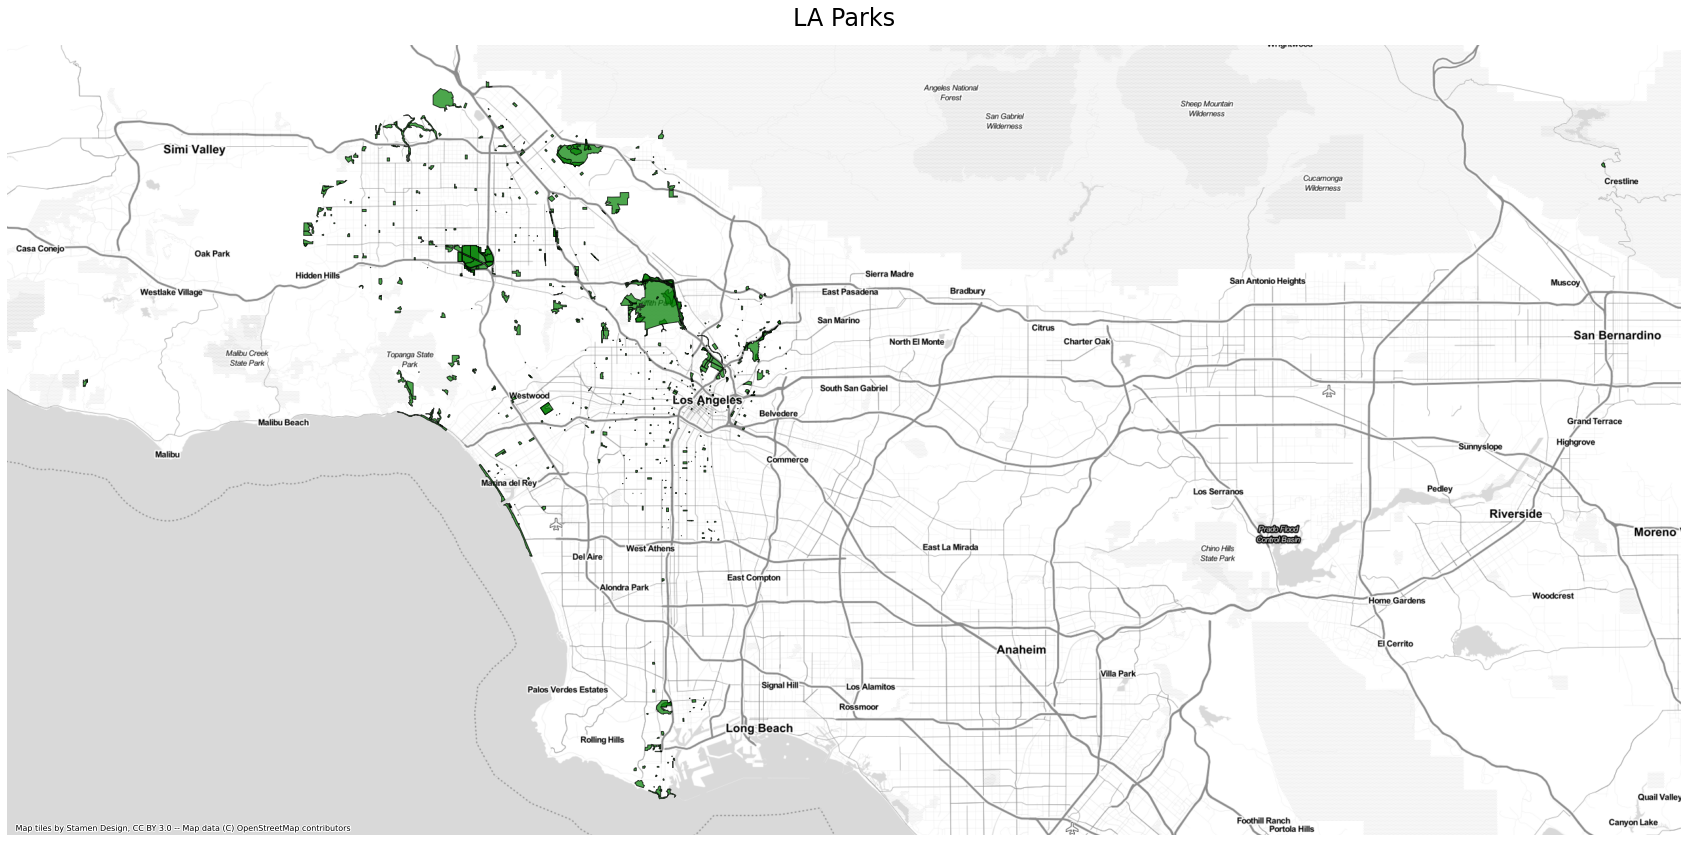

In [7]:
fig, ax = plt.subplots(figsize=(30,30))

# add the layer with ax=ax in the argument 
parks_mercator.plot(ax=ax,
                color="green",
                alpha=0.7,
                edgecolor="black"
               )

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('LA Parks',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.Stamen.TonerLite)

In [ ]:
parks.head(561)

In [ ]:
parks.drop([540])

In [ ]:
parks_sorted = parks.sort_values(by='cd_real',ascending = False)

In [ ]:
parks_sorted.head()